#**Theoretical**
---

### Q1. **What does R-squared represent in a regression model?**

ANS-> R-squared (R²) measures the goodness of fit for a regression model, indicating the proportion of variance in the dependent variable (y) explained by the independent variable(s) (x).

Interpretation:

1. 0 ≤ R² ≤ 1: Higher values indicate better fit.
2. 0: Model explains none of the variance.
3. 1: Model explains all variance (perfect fit).
4. 0.7: Model explains 70% of variance.

R-squared represents:

1. Proportion of variance explained
2. Goodness of fit
3. Model accuracy
4. Predictive power

Types of R-squared:

1. Simple R-squared: Measures linear regression fit.
2. Adjusted R-squared: Penalizes for additional features.
3. Cross-validated R-squared: Evaluates model performance on unseen data.

Key considerations:

1. High R-squared doesn't ensure causality.
2. Overfitting can inflate R-squared.
3. Compare R-squared across models.

Example (Python):

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sample data
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 3, 5, 7, 11]})

# Linear regression
model = LinearRegression()
model.fit(data['x'].values.reshape(-1, 1), data['y'])

# Predictions
y_pred = model.predict(data['x'].values.reshape(-1, 1))

# R-squared
r2 = r2_score(data['y'], y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.95


### **Q2. What are the assumptions of linear regression?**

ANS-> Linear Regression Assumptions:

1. Linearity: Relationship between independent variable(s) (X) and dependent variable (Y) is linear.
2. Independence: Observations are independent and identically distributed (i.i.d.).
3. Homoscedasticity: Constant variance of residuals across all levels of X.
4. Normality: Residuals follow a normal distribution.
5. No Multicollinearity: Independent variables are uncorrelated.
6. No Autocorrelation: Residuals have no serial correlation.
7. Outliers: No influential outliers.
8. Constant Variance: Variance of residuals is constant across X.

Diagnosing Assumption Violations:

1. Plotting: Scatter plots, residual plots, Q-Q plots.
2. Statistical Tests: Durbin-Watson, Breusch-Pagan, Shapiro-Wilk.

Consequences of Violations:

1. Biased Coefficients: Incorrect estimates.
2. Inaccurate Predictions: Poor model performance.
3. Invalid Inferences: Incorrect conclusions.

Remedies:

1. Data Transformation: Log, square root, or polynomial.
2. Robust Regression: Least Absolute Deviation (LAD).
3. Generalized Linear Models (GLM): Non-normal distributions.
4. Feature Engineering: Address multicollinearity.
5. Outlier Removal: Influential outlier removal.

Code Example (Python):

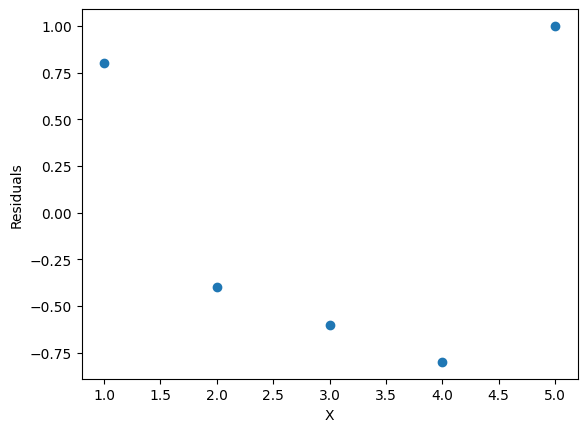

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 3, 5, 7, 11]})

# Add a second feature for VIF calculation
# This is just an example; replace with your actual additional feature
data['x2'] = data['x'] * 2

# Linear regression
model = LinearRegression()
model.fit(data[['x', 'x2']], data['y']) # Fit using both features

# Predictions
y_pred = model.predict(data[['x', 'x2']])

# Calculate residuals manually
residuals = data['y'] - y_pred

# Residual plot
plt.scatter(data['x'], residuals)
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()


### **Q3. What is the difference between R-squared and Adjusted R-squared?**

ANS-> R-squared (R²) and Adjusted R-squared (Adj R²) measure the goodness of fit for a regression model, but differ in their calculation and interpretation:

R-squared (R²):

1. Measures proportion of variance explained by independent variable(s).
2. Increases with added features, even if insignificant.
3. Does not penalize for model complexity.

Adjusted R-squared (Adj R²):

1. Measures proportion of variance explained, adjusting for model complexity.
2. Penalizes for added features, especially insignificant ones.
3. Provides more accurate estimate of model performance.

Key differences:

1. Penalty term: Adj R² includes a penalty for added features.
2. Complexity adjustment: Adj R² considers model degrees of freedom.
3. Interpretation: Adj R² provides a more realistic view of model performance.

When to use:

1. R²: Initial model evaluation, simple models.
2. Adj R²: Model comparison, feature selection, complex models.

Code example (Python):


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

# Sample data
data = pd.DataFrame({'x1': [1, 2, 3, 4, 5], 'x2': [2, 3, 5, 7, 11], 'y': [2, 3, 5, 7, 11]})

# Linear regression
model = LinearRegression()
model.fit(data[['x1', 'x2']], data['y'])

# R-squared
r2 = model.score(data[['x1', 'x2']], data['y'])
print(f'R-squared: {r2:.2f}')

# Adjusted R-squared
ols_model = OLS(data['y'], data[['x1', 'x2']]).fit()
adj_r2 = ols_model.rsquared_adj
print(f'Adjusted R-squared: {adj_r2:.2f}')

R-squared: 1.00
Adjusted R-squared: 1.00


### **Q4. Why do we use Mean Squared Error (MSE)?**

ANS-> Mean Squared Error (MSE) measures the average squared difference between predicted and actual values, evaluating model performance.

Why use MSE:

1. Quantifies error magnitude
2. Penalizes large errors
3. Easy to compute and interpret
4. Differentiable, suitable for optimization
5. Widely used, comparable across models

MSE applications:

1. Regression evaluation
2. Model selection
3. Hyperparameter tuning
4. Time series forecasting
5. Image and signal processing

MSE formula:

MSE = (1/n) * ∑(y_true - y_pred)^2

Where:

- y_true: Actual values
- y_pred: Predicted values
- n: Number of observations

MSE interpretation:

- Lower MSE: Better model fit
- MSE = 0: Perfect predictions
- High MSE: Large errors

Common MSE-based metrics:

1. Root Mean Squared Error (RMSE): √MSE
2. Mean Absolute Error (MAE): average absolute difference
3. Mean Absolute Percentage Error (MAPE): average absolute percentage difference

Code example (Python):


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Actual values
y_true = np.array([1, 2, 3, 4, 5])

# Predicted values
y_pred = np.array([1.1, 2.1, 3.2, 4.3, 5.4])

# Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Squared Error: 0.06
Root Mean Squared Error: 0.25


### **Q5. What does an Adjusted R-squared value of 0.85 indicate?**

ANS->Adjusted R-squared (Adj R²) of 0.85 indicates:

1. High goodness of fit: The model explains approximately 85% of the variance in the dependent variable.
2. Strong predictive power: The model is effective in predicting the outcome variable.
3. Minimal overfitting: The adjustment for model complexity penalizes for unnecessary features.

Interpretation:

1. 85% of variance explained: The model accounts for most of the variation in the data.
2. 15% unexplained variance: Some factors may still influence the outcome, but are not captured by the model.
3. Robust model: Adj R² considers model complexity, indicating the model is well-regularized.

Implications:

1. Trustworthy predictions: Use the model for accurate predictions.
2. Identify remaining factors: Investigate remaining 15% unexplained variance.
3. Model refinement: Consider additional features or alternative models.

Comparison:

1. R-squared (R²): Measures variance explained (may be inflated).
2. Adjusted R-squared (Adj R²): Measures variance explained, adjusted for complexity.

Example:

Suppose a linear regression model predicts house prices based on features like size, location, and number of bedrooms. An Adj R² of 0.85 indicates:

1. The model accurately predicts house prices (85% variance explained).
2. Location and size are significant factors.
3. Consider additional features (e.g., number of floors, age) to capture remaining variance.

Code example (Python):

In [1]:


import pandas as pd
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Sample data
data = pd.DataFrame({'size': [1000, 2000, 3000], 'location': ['city', 'suburb', 'city'], 'price': [200000, 300000, 400000]})

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'location' column
data['location_encoded'] = label_encoder.fit_transform(data['location'])

# Linear regression, use the encoded column instead of 'location'
model = OLS(data['price'], data[['size', 'location_encoded']]).fit()

# Adjusted R-squared
adj_r2 = model.rsquared_adj
print(f'Adjusted R-squared: {adj_r2:.2f}')

Adjusted R-squared: 0.96


### **Q6. How do we check for normality of residuals in linear regression?**

ANS-> To check for normality of residuals in linear regression:

1. Visual Methods:
    1. Q-Q Plot (Quantile-Quantile Plot): Compare residual distribution to normal distribution.
    2. Histogram: Check residual distribution shape.
    3. Density Plot: Visualize residual density.
2. Statistical Tests:
    1. Shapiro-Wilk Test: Measures normality (p-value < 0.05 indicates non-normality).
    2. Kolmogorov-Smirnov Test: Compares residual distribution to normal.
3. Residual Plots:
    1. Residual vs. Fitted Plot: Check for curvature or patterns.
    2. Residual vs. Independent Variable Plot: Identify non-random patterns.

Tools:

1. Python:
    1. statsmodels: qqplot(), hist(), density()
    2. scipy: shapiro(), ks_2samp()
    3. matplotlib and seaborn: Visualization
2. R:
    1. ggplot2: Visualization
    2. stats: shapiro.test(), ks.test()

Example (Python):


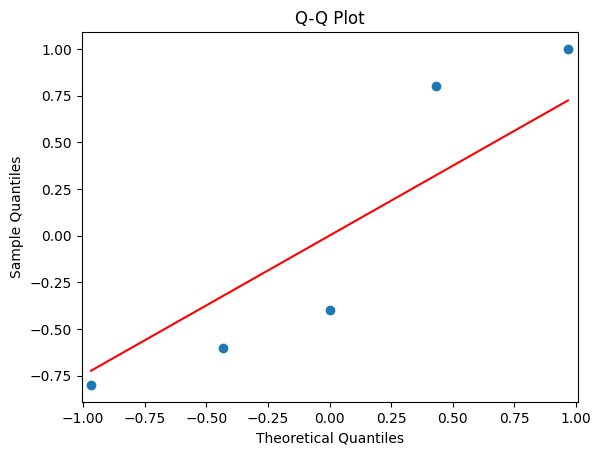

Shapiro-Wilk Test: p-value = 0.1668


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# Sample data
np.random.seed(0)
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 3, 5, 7, 11]})

# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data['x'].values.reshape(-1, 1), data['y'])

# Predictions
y_pred = model.predict(data['x'].values.reshape(-1, 1))

# Calculate residuals manually
residuals = data['y'] - y_pred  # Difference between actual and predicted

# Q-Q Plot
qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
stat, p = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: p-value = {p:.4f}')

### **Q7. What is multicollinearity, and how does it impact regression?**

ANS-> Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it challenging to:

1. Interpret coefficients
2. Estimate model parameters
3. Make predictions

Effects of multicollinearity:

1. Instability: Small changes in data lead to large changes in coefficients.
2. Inflated variance: Standard errors increase, reducing precision.
3. Biased coefficients: Estimates may be incorrect or misleading.
4. Model instability: Coefficients sensitive to data transformations.

Consequences:

1. Overfitting: Model performs well on training data but poorly on new data.
2. Incorrect conclusions: Misleading interpretations of coefficients.
3. Model selection: Difficulty selecting relevant features.

Detection methods:

1. Correlation matrix: Visualize correlations between variables.
2. Variance inflation factor (VIF): Measures inflation in variance.
3. Tolerance: Measures proportion of variance not explained.

Remedies:

1. Feature selection: Remove highly correlated variables.
2. Dimensionality reduction: PCA, factor analysis.
3. Regularization: Ridge regression, Lasso.
4. Data transformation: Standardize or normalize variables.

Code example (Python):

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = pd.DataFrame({'x1': [1, 2, 3, 4, 5], 'x2': [2, 3, 5, 7, 11], 'y': [2, 3, 5, 7, 11]})

# Correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

# Variance inflation factor (VIF)
vif = variance_inflation_factor(data[['x1', 'x2']], 0)
print(f'VIF: {vif:.2f}')

          x1        x2         y
x1  1.000000  0.972272  0.972272
x2  0.972272  1.000000  1.000000
y   0.972272  1.000000  1.000000
VIF: 56.08


### **8. What is Mean Absolute Error (MAE)?**

ANS-> Mean Absolute Error (MAE) measures the average absolute difference between predicted and actual values.

MAE Formula:

MAE = (1/n) * ∑|y_true - y_pred|

Where:

1. y_true: Actual values
2. y_pred: Predicted values
3. n: Number of observations

Interpretation:

1. Lower MAE: Better model performance
2. MAE = 0: Perfect predictions
3. High MAE: Large errors

Advantages:

1. Easy to understand and calculate
2. Robust to outliers (compared to MSE)
3. Suitable for skewed distributions

Disadvantages:

1. Does not penalize large errors severely
2. Not differentiable (limits optimization)

Common applications:

1. Regression evaluation
2. Time series forecasting
3. Image and signal processing

Comparison to Mean Squared Error (MSE):

1. MAE emphasizes absolute errors
2. MSE emphasizes squared errors (penalizes large errors)

Code example (Python):

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Actual values
y_true = np.array([1, 2, 3, 4, 5])

# Predicted values
y_pred = np.array([1.1, 2.1, 3.2, 4.3, 5.4])

# Mean Absolute Error
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.22


### **Q9. What are the benefits of using an ML pipeline?**

ANS-> Benefits of using an ML pipeline:

1. Streamlined workflow: Automates data preparation, model training, and deployment.
2. Improved efficiency: Reduces manual effort and minimizes errors.
3. Enhanced collaboration: Facilitates teamwork among data scientists and engineers.
4. Version control: Tracks changes and maintains reproducibility.
5. Model management: Organizes and deploys multiple models.
6. Data governance: Ensures data quality, security, and compliance.
7. Scalability: Supports large datasets and complex models.
8. Portability: Allows model deployment across environments.
9. Monitoring and logging: Tracks performance and identifies issues.
10. Continuous integration and deployment (CI/CD): Automates testing and deployment.

Key components:

1. Data ingestion
2. Data preprocessing
3. Model training
4. Model evaluation
5. Model deployment
6. Model monitoring
7. Model updating

Tools:

1. TensorFlow Extended (TFX)
2. Apache Airflow
3. Apache NiFi
4. Kubeflow
5. AWS SageMaker
6. Azure Machine Learning
7. Google Cloud AI Platform

Best practices:

1. Modularize pipeline components
2. Use containerization (Docker, Kubernetes)
3. Implement data validation and testing
4. Monitor performance metrics
5. Document pipeline architecture and components

Example pipeline:

1. Data ingestion: Load dataset from CSV
2. Data preprocessing: Handle missing values, normalize features
3. Model training: Train random forest classifier
4. Model evaluation: Calculate accuracy, F1 score
5. Model deployment: Deploy to production environment
6. Model monitoring: Track performance, retrain as needed



### **Q10. Why is RMSE considered more interpretable than MSE?**

Root Mean Squared Error (RMSE) is considered more interpretable than Mean Squared Error (MSE) for several reasons:

1. Same units as data: RMSE has the same units as the original data, making it easier to understand and compare to actual values.
2. Directly comparable: RMSE values can be directly compared across different models or datasets with the same units.
3. Easy to interpret: RMSE represents the standard deviation of the errors, providing a clear understanding of the model's performance.
4. Visualizable: RMSE can be visualized as the radius of a circle, making it intuitive to understand.
5. Real-world implications: RMSE is often used in real-world applications, such as finance, engineering, and physics, where errors have direct consequences.

In contrast, MSE:

1. Squared units: MSE has squared units, making it difficult to interpret and compare to actual values.
2. Abstract measure: MSE is an abstract measure, lacking direct connection to the original data.
3. Not directly comparable: MSE values cannot be directly compared across different models or datasets with different units.

Example:

Suppose a regression model predicts house prices (in thousands of dollars).

MSE: 100
RMSE: 10

Interpretation:

- MSE (100) is difficult to understand without context.
- RMSE (10) indicates the model's average error is approximately $10,000.

Code example (Python):


In [ ]:
import numpy as np

# Actual values
y_true = np.array([100, 120, 110])

# Predicted values
y_pred = np.array([90, 130, 105])

# MSE
mse = np.mean((y_true - y_pred) ** 2)
print(f'MSE: {mse:.2f}')

# RMSE
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

MSE: 75.00
RMSE: 8.66


### **Q11. What is pickling in Python, and how is it useful in ML?**

ANS-> Pickling in Python:

Pickling is a process to serialize and de-serialize Python objects, converting them into byte streams. This allows:

1. Object persistence: Save objects to files or databases.
2. Object sharing: Share objects between Python scripts or processes.
3. Object caching: Store computed results for later use.

pickle module:

Python's built-in pickle module provides functions for pickling:

1. pickle.dump(): Serialize object to file.
2. pickle.load(): Deserialize object from file.

Example:


In [ ]:
import pickle

# Create object
data = {'name': 'John', 'age': 30}

# Pickle object
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

# Unpickle object
with open('data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
print(loaded_data)  # {'name': 'John', 'age': 30}

{'name': 'John', 'age': 30}


Usefulness in Machine Learning (ML):

1. Model persistence: Save trained models to files.
2. Model sharing: Share trained models between scripts or team members.
3. Model caching: Store computed model results for later use.
4. Data preprocessing: Save preprocessed data for later use.
5. Hyperparameter tuning: Save hyperparameter combinations for later evaluation.

ML libraries supporting pickling:

1. scikit-learn
2. TensorFlow
3. PyTorch

Example (scikit-learn):

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pickle

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Pickle model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Unpickle model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    print(loaded_model.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### **Q12. What does a high R-squared value mean?**

ANS-> A high R-squared (R²) value indicates:

1. Strong linear relationship: The independent variable(s) effectively explain the variation in the dependent variable.
2. Good model fit: The model accurately predicts the data.
3. High variance explanation: The model explains a large proportion of the data's variance.

Interpretation:

1. R² = 0.9: 90% of the data's variance is explained by the model.
2. R² = 0.8: 80% of the data's variance is explained by the model.
3. R² = 0.7: 70% of the data's variance is explained by the model.

Guidelines:

1. 0.9 ≤ R² ≤ 1: Excellent fit (90-100% variance explained)
2. 0.7 ≤ R² < 0.9: Good fit (70-89% variance explained)
3. 0.5 ≤ R² < 0.7: Fair fit (50-69% variance explained)
4. 0.3 ≤ R² < 0.5: Poor fit (30-49% variance explained)
5. R² < 0.3: Very poor fit (<30% variance explained)

Limitations:

1. Overfitting: High R² doesn't guarantee good predictions.
2. Multicollinearity: High R² can mask multicollinearity issues.
3. Non-linear relationships: R² measures linear relationships only.

Example:

Suppose a regression model predicts house prices based on square footage.

R² = 0.85

Interpretation: The model explains 85% of the variation in house prices, indicating a strong linear relationship between square footage and house prices.

Code example (Python):


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data
data = pd.DataFrame({'sqft': [1000, 2000, 3000], 'price': [200000, 300000, 400000]})

# Linear regression
model = LinearRegression()
model.fit(data['sqft'].values.reshape(-1, 1), data['price'])

# R-squared
r2 = model.score(data['sqft'].values.reshape(-1, 1), data['price'])
print(f'R-squared: {r2:.2f}')

R-squared: 1.00


### **Q13.What happens if linear regression assumptions are violated?**

ANS-> Consequences of violating linear regression assumptions:

Assumptions and Consequences

1. Linearity

- Violation: Non-linear relationship between independent and dependent variables.
- Consequences:
    - Biased coefficients.
    - Incorrect predictions.
    - Over/underestimation of relationships.
- Remedies:
    - Transform variables (e.g., log, square).
    - Use non-linear models (e.g., polynomial regression, generalized additive models).

2. Independence

- Violation: Observations not independent (e.g., time series, clustered data).
- Consequences:
    - Inflated variance.
    - Incorrect standard errors.
    - Biased coefficients.
- Remedies:
    - Use time series analysis or generalized least squares.
    - Account for clustering (e.g., robust standard errors).

3. Homoscedasticity

- Violation: Non-constant variance across independent variable levels.
- Consequences:
    - Inefficient estimates.
    - Incorrect standard errors.
    - Biased coefficients.
- Remedies:
    - Transform variables (e.g., log, square).
    - Use weighted least squares or robust regression.

4. Normality

- Violation: Non-normal residuals.
- Consequences:
    - Incorrect inference (t-tests, confidence intervals).
    - Biased coefficients.
- Remedies:
    - Transform variables (e.g., log, square).
    - Use robust regression or non-parametric tests.

5. No Multicollinearity

- Violation: High correlation between independent variables.
- Consequences:
    - Unstable estimates.
    - Incorrect standard errors.
    - Biased coefficients.
- Remedies:
    - Remove highly correlated variables.
    - Use dimensionality reduction (e.g., PCA).

6. No Outliers

- Violation: Influential outliers.
- Consequences:
    - Biased coefficients.
    - Incorrect predictions.
    - Over/underestimation of relationships.
- Remedies:
    - Remove outliers.
    - Use robust regression.

Detection Methods

1. Visual inspection (plots).
2. Statistical tests (e.g., Shapiro-Wilk, Durbin-Watson).
3. Diagnostic metrics (e.g., VIF, condition index).

Remedies

1. Data transformation.
2. Model selection (e.g., generalized linear models).
3. Robust regression techniques.
4. Dimensionality reduction.
5. Outlier removal.



### **Q14. How can we address multicollinearity in regression?**

ANS-> Addressing Multicollinearity in Regression:

Detection Methods
1. Variance Inflation Factor (VIF)
2. Tolerance
3. Correlation Matrix
4. Condition Index
Remedies
5. Remove highly correlated variables
6. Dimensionality reduction
    1. Principal Component Analysis (PCA)
    2. Factor Analysis
7. Regularization techniques
    1. Ridge Regression
    2. Lasso Regression
8. Data transformation
    1. Standardize or normalize variables
9. Model selection
    1. Stepwise regression
    2. Forward selection
    3. Backward elimination
10. Collect more data
11. Use robust regression methods
    1. Robust least squares
VIF Calculation

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = pd.DataFrame({'x1': [1, 2, 3, 4, 5], 'x2': [2, 3, 5, 7, 11]})

# Calculate VIF
vif = variance_inflation_factor(data[['x1', 'x2']], 0)
print(f'VIF: {vif:.2f}')


# Ridge Regression Example


from sklearn.linear_model import Ridge

# Sample data
data = pd.DataFrame({'x1': [1, 2, 3, 4, 5], 'x2': [2, 3, 5, 7, 11], 'y': [2, 3, 5, 7, 11]})

# Ridge regression
model = Ridge(alpha=0.5)
model.fit(data[['x1', 'x2']], data['y'])

print(model.coef_)


# Lasso Regression Example


from sklearn.linear_model import Lasso

# Sample data
data = pd.DataFrame({'x1': [1, 2, 3, 4, 5], 'x2': [2, 3, 5, 7, 11], 'y': [2, 3, 5, 7, 11]})

# Lasso regression
model = Lasso(alpha=0.5)
model.fit(data[['x1', 'x2']], data['y'])

print(model.coef_)


VIF: 56.08
[0.18691589 0.91079014]
[0.         0.95117187]


### **Q15. Why do we use pipelines in machine learning?**

ANS-> Pipelines in Machine Learning:

Benefits:

1. Streamlined workflow: Automate data preparation, model training, and evaluation.
2. Improved efficiency: Reduce manual effort and minimize errors.
3. Enhanced collaboration: Facilitate teamwork among data scientists and engineers.
4. Version control: Track changes and maintain reproducibility.
5. Model management: Organize and deploy multiple models.

Key Components:

1. Data ingestion: Load and preprocess data.
2. Feature engineering: Transform and select relevant features.
3. Model training: Train and tune machine learning models.
4. Model evaluation: Assess performance metrics.
5. Model deployment: Deploy models to production.

Advantages:

1. Simplified hyperparameter tuning: Optimize parameters across multiple stages.
2. Efficient cross-validation: Evaluate models with reduced computational overhead.
3. Better model selection: Compare performance across multiple models.
4. Improved data quality: Detect and handle data issues early.
5. Faster prototyping: Rapidly test and iterate on new ideas.

Popular Pipeline Tools:

1. Apache Airflow
2. Kubeflow
3. TensorFlow Extended (TFX)
4. Scikit-learn Pipeline
5. PySpark ML

Example (Scikit-learn Pipeline):

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import for data splitting
import pandas as pd # Import pandas for DataFrame creation (if needed)
# ... (your existing code) ...

# Sample data (Replace with your actual data)
# Assuming your data is in a pandas DataFrame called 'data'
# with features in columns 'x1', 'x2' and target in column 'y'

X = data[['x1', 'x2']] # Features
y = data['y'] # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# ... (rest of your existing pipeline code) ...

# Fit pipeline
pipeline.fit(X_train, y_train)

# Evaluate pipeline
accuracy = pipeline.score(X_test, y_test)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.000


### **Q16. How is Adjusted R-squared calculated?**

ANS-> Adjusted R-squared Calculation:

Adjusted R-squared measures the goodness of fit for a regression model, adjusting for the number of predictors.

Formula:

Adjusted R-squared = 1 - (1 - R-squared) × (n - 1) / (n - k - 1)

Where:

1. R-squared: Proportion of variance explained by the model
2. n: Sample size (number of observations)
3. k: Number of predictors (independent variables)

Steps:

1. Calculate R-squared.
2. Calculate the penalty term: (1 - R-squared) × (n - 1).
3. Calculate Adjusted R-squared.

Example:

Suppose a regression model with:

1. R-squared = 0.8
2. n = 100
3. k = 3

Adjusted R-squared calculation:

1. Penalty term = (1 - 0.8) × (100 - 1) = 0.2 × 99 = 19.8
2. Adjusted R-squared = 1 - 19.8 / (100 - 3 - 1) = 1 - 19.8 / 96 ≈ 0.793

Interpretation:

Adjusted R-squared values:

1. 0.9 ≤ Adjusted R-squared ≤ 1: Excellent fit
2. 0.7 ≤ Adjusted R-squared < 0.9: Good fit
3. 0.5 ≤ Adjusted R-squared < 0.7: Fair fit
4. Adjusted R-squared < 0.5: Poor fit

Code example (Python):

In [ ]:
# prompt: How is Adjusted R-squared calculated?

import numpy as np

def adjusted_r_squared(r_squared, n, k):
  """Calculates the adjusted R-squared value.

  Args:
    r_squared: The R-squared value.
    n: The sample size.
    k: The number of predictors.

  Returns:
    The adjusted R-squared value.
  """
  adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
  return adjusted_r2

# Example usage
r2 = 0.8
n = 100
k = 3
adj_r2 = adjusted_r_squared(r2, n, k)
print(f"Adjusted R-squared: {adj_r2:.3f}")

Adjusted R-squared: 0.794


### **Q17. Why is MSE sensitive to outliers?**

Mean Squared Error (MSE) Sensitivity to Outliers:

MSE calculates the average squared difference between predicted and actual values.

MSE = (1/n) ∑(y_true - y_pred)^2

Outliers affect MSE in two ways:

1. Squared term: Outliers have large errors, which become even larger when squared. This amplifies their impact on MSE.
2. Average calculation: Outliers contribute disproportionately to the average, pulling the MSE value away from the true value.

Consequences:

1. Inflated MSE: Outliers increase MSE, making the model appear less accurate.
2. Biased evaluation: MSE overemphasizes outlier errors, leading to incorrect conclusions.
3. Suboptimal hyperparameter tuning: Outliers dominate the optimization process.

Examples:

1. Regression: An outlier with a large error (e.g., 100) contributes 10,000 to MSE, while an inlier with a small error (e.g., 1) contributes only 1.
2. Time series forecasting: A single outlier can significantly impact MSE, masking the model's performance.

Robust alternatives:

1. Mean Absolute Error (MAE): Less sensitive to outliers, as errors are not squared.
2. Mean Absolute Percentage Error (MAPE): Similar to MAE, but relative to actual values.
3. Huber Loss: Combines MSE and MAE, reducing outlier impact.
4. Robust regression techniques: Use methods like Least Absolute Deviation (LAD) or M-estimators.

Code example (Python):

In [ ]:
import numpy as np

# Sample data
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1, 2, 3, 4, 100])  # outlier

# MSE
mse = np.mean((y_true - y_pred) ** 2)
print(f'MSE: {mse:.2f}')

# MAE
mae = np.mean(np.abs(y_true - y_pred))
print(f'MAE: {mae:.2f}')

MSE: 1805.00
MAE: 19.00


### **Q18. What is the role of homoscedasticity in linear regression?**

ANS-> Homoscedasticity in Linear Regression:

Homoscedasticity assumes that the variance of residuals (ε) is constant across all levels of the independent variable(s).

Role:

1. Constant variance: Ensures that residuals have equal spread throughout the data range.
2. Equal error variance: Allows for accurate inference and hypothesis testing.
3. Unbiased estimates: Ensures that coefficient estimates are unbiased.

Consequences of heteroscedasticity (violating homoscedasticity):

1. Inefficient estimates: Coefficient estimates remain unbiased but have inflated variance.
2. Incorrect inference: t-tests, confidence intervals, and p-values are unreliable.
3. Biased standard errors: Under/overestimation of standard errors.

Types of heteroscedasticity:

1. Increasing variance: Residual variance increases with independent variable.
2. Decreasing variance: Residual variance decreases with independent variable.
3. Non-monotonic variance: Residual variance changes unpredictably.

Detection methods:

1. Visual inspection: Plot residuals vs. independent variable.
2. Breusch-Pagan test: Statistical test for heteroscedasticity.
3. White test: Statistical test for heteroscedasticity.

Remedies:

1. Transform variables: Log, square, or inverse transformation.
2. Weighted least squares: Assign different weights to observations.
3. Robust regression: Use robust standard errors or sandwich estimators.
4. Generalized linear models: Choose appropriate distribution (e.g., Poisson, logistic).

Code example (Python):

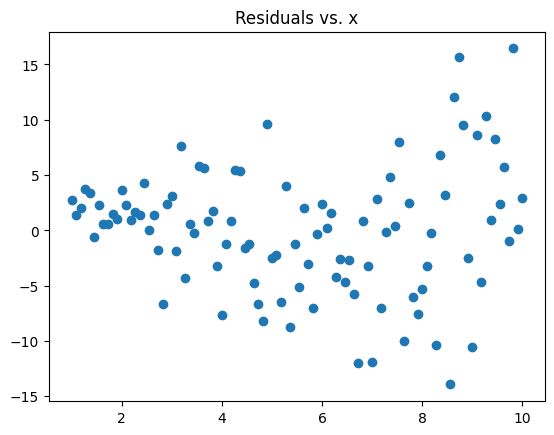

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
np.random.seed(0)
x = np.linspace(1, 10, 100)
y = 2 * x + np.random.normal(0, x)  # heteroscedasticity

# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Residuals
residuals = y - model.predict(x.reshape(-1, 1))

# Plot residuals vs. x
plt.scatter(x, residuals)
plt.title('Residuals vs. x')
plt.show()


### **Q19. What is Root Mean Squared Error (RMSE)?**

ANS-> Root Mean Squared Error (RMSE):

RMSE measures the square root of the average squared difference between predicted and actual values.

Formula:

RMSE = √[(1/n) ∑(y_true - y_pred)^2]

Where:

1. y_true: Actual values
2. y_pred: Predicted values
3. n: Sample size

Interpretation:

1. Lower RMSE: Better model performance
2. RMSE = 0: Perfect predictions
3. High RMSE: Large errors

Advantages:

1. Easy to interpret
2. Sensitive to outliers
3. Comparable across models

Disadvantages:

1. Squares errors, amplifying large mistakes
2. Not robust to outliers

Applications:

1. Regression evaluation
2. Time series forecasting
3. Image and signal processing

Comparison to Mean Absolute Error (MAE):

1. RMSE penalizes large errors more severely
2. MAE more robust to outliers

Code example (Python):

In [ ]:
import numpy as np

# Actual values
y_true = np.array([1, 2, 3, 4, 5])

# Predicted values
y_pred = np.array([1.1, 2.1, 3.2, 4.3, 5.4])

# RMSE calculation
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.25


### **Q20. Why is pickling considered risky?**

ANS-> Pickling Risks:

Pickling, Python's object serialization process, poses security risks due to:

1. Arbitrary Code Execution: Pickled objects can contain malicious code, executed upon unpickling.
2. Deserialization Vulnerabilities: Pickling can lead to deserialization attacks, exploiting vulnerabilities in dependent libraries.
3. Data Tampering: Pickled data can be modified or corrupted during transmission/storage.
4. Dependence on Specific Python Version: Pickled objects may not be compatible across Python versions.
5. Potential for Denial-of-Service (DoS) Attacks: Malicious pickled objects can cause crashes or resource exhaustion.

Best Practices to Mitigate Risks:

1. Only unpickle trusted data: Verify source and authenticity.
2. Use secure protocols: Encrypt and authenticate pickled data.
3. Validate pickled data: Check structure and content.
4. Use latest Python versions: Ensure bug fixes and security patches.
5. Consider alternative serialization: JSON, YAML, or MessagePack.

Safe Unpickling Strategies:

1. Use pickle.load() with caution: Only with trusted data.
2. Implement custom unpickling: Validate and sanitize data.
3. Use pickle.loads() with restrictions: Limit allowed object types.
4. Utilize third-party libraries: dill, cloudpickle, or joblib.

Example (Safe Unpickling):


In [ ]:
import pickle

# Only unpickle trusted data
def safe_unpickle(data):
    try:
        return pickle.loads(data)
    except pickle.UnpicklingError as e:
        print(f"Unpickling error: {e}")
        return None

# Test with trusted pickled data
pickled_data = pickle.dumps({"name": "John"})
unpickled_data = safe_unpickle(pickled_data)
print(unpickled_data)  # Output: {'name': 'John'}

{'name': 'John'}


### **Q21. What alternatives exist to pickling for saving ML models?**
ANS-> Alternatives to Pickling for Saving ML Models:

1. Joblib: Efficient serialization for Python objects, suitable for ML models.
2. Dill: Similar to Pickle, but supports more object types.
3. CloudPickle: Fast, secure serialization for distributed computing.
4. HDF5: Binary format for storing numerical data, suitable for ML models.
5. TensorFlow SavedModel: Native TensorFlow model serialization.
6. PyTorch Serialization: Native PyTorch model serialization.
7. ONNX (Open Neural Network Exchange): Platform-agnostic model serialization.
8. PMML (Predictive Model Markup Language): Standard for deploying ML models.
9. Scikit-learn's built-in serialization: Supports various formats (e.g., CSV, JSON).
10. Model-specific serialization: Some libraries (e.g., LightGBM, XGBoost) provide custom serialization.

Comparison:

| Alternative | Advantages | Disadvantages |
| --- | --- | --- |
| Joblib | Fast, efficient | Limited platform support |
| Dill | Flexible, supports multiple object types | Security concerns |
| CloudPickle | Secure, fast | Limited compatibility |
| HDF5 | Efficient storage, supports large data | Complex API |
| TensorFlow SavedModel | Native support, efficient | TensorFlow-specific |
| PyTorch Serialization | Native support, efficient | PyTorch-specific |
| ONNX | Platform-agnostic, flexible | Limited library support |
| PMML | Standardized, widely supported | Complex implementation |

Example (Joblib):

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import joblib

# Train model
iris = load_iris()
model = RandomForestClassifier(n_estimators=100)
model.fit(iris.data, iris.target)

# Save model
joblib.dump(model, 'model.joblib')

# Load model
loaded_model = joblib.load('model.joblib')


### **Q22. What is heteroscedasticity, and why is it a problem?**

ANS-> Heteroscedasticity:

Heteroscedasticity occurs when the variance of residuals (errors) in a regression model changes across different levels of the independent variable(s). This means the spread of residuals is not constant.

Types:

1. Increasing variance: Residual variance increases as the independent variable increases.
2. Decreasing variance: Residual variance decreases as the independent variable increases.
3. Non-monotonic variance: Residual variance changes unpredictably.

Consequences:

1. Inefficient estimates: Coefficient estimates remain unbiased but have inflated variance.
2. Incorrect inference: t-tests, confidence intervals, and p-values are unreliable.
3. Biased standard errors: Under/overestimation of standard errors.

Problems:

1. Distorted hypothesis testing
2. Inaccurate confidence intervals
3. Biased prediction intervals
4. Model misspecification
5. Reduced model accuracy

Detection methods:

1. Visual inspection: Plot residuals vs. independent variable.
2. Breusch-Pagan test
3. White test
4. Goldfeld-Quandt test

Remedies:

1. Transform variables: Log, square, or inverse transformation.
2. Weighted least squares (WLS)
3. Robust regression: Use robust standard errors or sandwich estimators.
4. Generalized linear models (GLM): Choose appropriate distribution.
5. Model re-specification

Code example (Python):


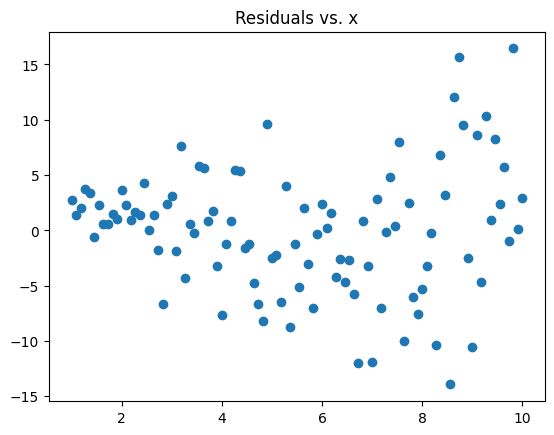

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
np.random.seed(0)
x = np.linspace(1, 10, 100)
y = 2 * x + np.random.normal(0, x)  # heteroscedasticity

# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Residuals
residuals = y - model.predict(x.reshape(-1, 1))

# Plot residuals vs. x
plt.scatter(x, residuals)
plt.title('Residuals vs. x')
plt.show()

### **Q23. How does adding irrelevant predictors affect R-squared and Adjusted R-squared?**

ANS-> Adding Irrelevant Predictors:

Effects on R-squared and Adjusted R-squared:

R-squared:

1. Increases or remains constant: Irrelevant predictors can artificially inflate R-squared.
2. May overestimate model fit.

Adjusted R-squared:

1. Decreases or remains constant: Penalizes additional predictors.
2. Provides more accurate assessment of model fit.

Why Adjusted R-squared decreases:

1. Penalty term: (n-1)/(n-k-1) increases as k (number of predictors) grows.
2. Irrelevant predictors add noise, reducing model efficiency.

Consequences:

1. Overfitting: Model becomes overly complex.
2. Decreased generalization performance.
3. Increased risk of false discoveries.

Best practices:

1. Regularization techniques (L1, L2).
2. Feature selection methods (Forward, Backward, Stepwise).
3. Cross-validation.
4. Information criteria (AIC, BIC).

Code example (Python):

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Sample data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)  # irrelevant predictor
y = 2 * x1 + np.random.normal(0, 1, 100)

# Data frame
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Linear regression
model1 = LinearRegression()
model1.fit(df[['x1']], df['y']) # x1 is reshaped to a 2D array using double brackets

model2 = LinearRegression()
model2.fit(df[['x1', 'x2']], df['y']) # x1 and x2 are reshaped to a 2D array using double brackets


print("R-squared (relevant predictor only):", model1.score(df[['x1']], df['y'])) # x1 is reshaped to a 2D array using double brackets
print("R-squared (with irrelevant predictor):", model2.score(df[['x1', 'x2']], df['y'])) # x1 and x2 are reshaped to a 2D array using double brackets

#Adjusted R^2 Calculations need to be performed on the whole dataframe and not just y
print("Adjusted R-squared (relevant predictor only):", 1 - (len(df) - 1) / (len(df) - 2) * (1 - model1.score(df[['x1']], df['y']))) # x1 is reshaped to a 2D array using double brackets
print("Adjusted R-squared (with irrelevant predictor):", 1 - (len(df) - 1) / (len(df) - 3) * (1 - model2.score(df[['x1', 'x2']], df['y']))) # x1 and x2 are reshaped to a 2D array using double brackets

R-squared (relevant predictor only): 0.8287531565195481
R-squared (with irrelevant predictor): 0.8291472009979431
Adjusted R-squared (relevant predictor only): 0.8270057397493393
Adjusted R-squared (with irrelevant predictor): 0.8256244628741894


# **Practical**
---

### **Q1. Write a Python script that calculates the Mean Squared Error (MSE) and Mean Absolute Error (MAE) for a multiple linear regression model using Seaborn's "diamonds" dataset.**

In [ ]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load Seaborn's diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Preprocess data
X = diamonds[['carat', 'cut', 'color', 'clarity']]
y = diamonds['price']

# Convert categorical variables to numerical variables
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 1346335.59
Mean Absolute Error (MAE): 802.12


### **Q2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.**

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import fetch_california_housing # Import fetch_california_housing

# Load California Housing dataset instead of Boston Housing
california = fetch_california_housing() # Use fetch_california_housing
X = california.data
y = california.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 0.56
Mean Absolute Error (MAE): 0.53
Root Mean Squared Error (RMSE): 0.75


### **Q3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.**

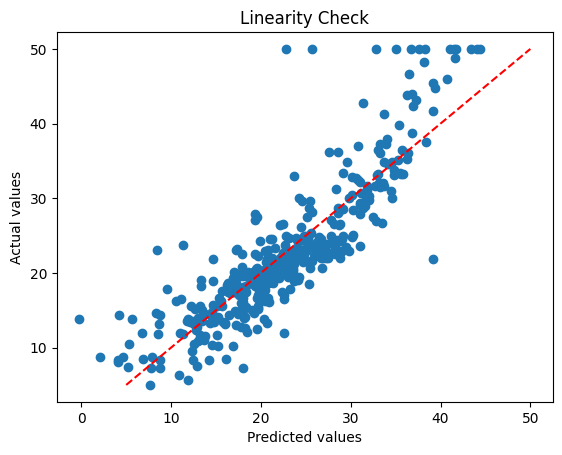

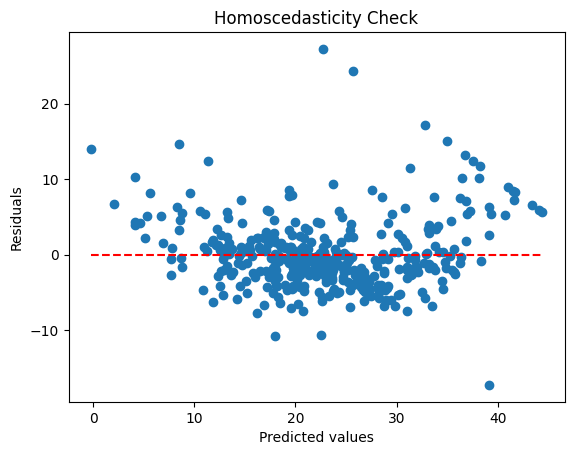

   Features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


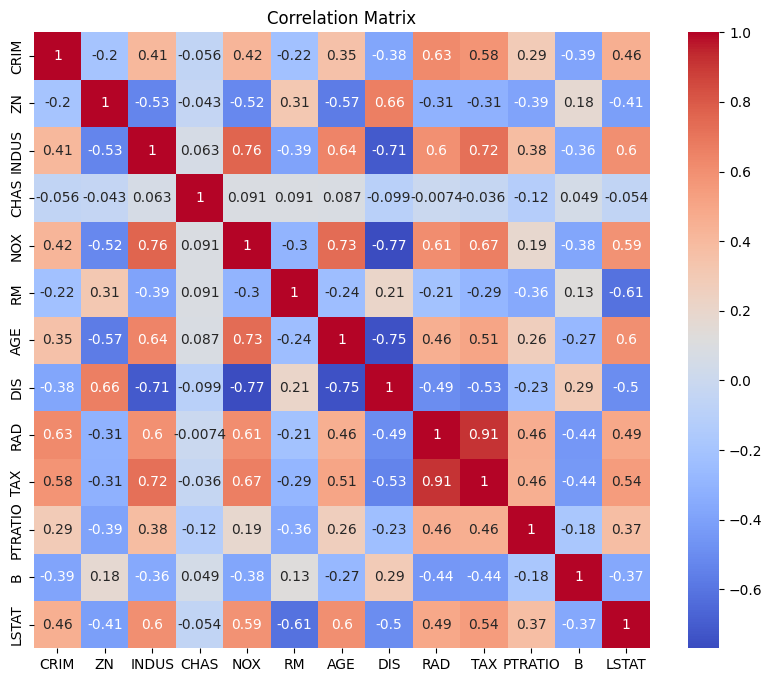

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Instead of load_boston, fetch the dataset from the original source:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create DataFrame
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['PRICE'] = target # Add target as 'PRICE' column


# Split data into training and testing sets
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Check linearity assumption
# Plot scatter plot of predicted values vs. actual values
y_pred = model.predict(X_train)
plt.scatter(y_pred, y_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Linearity Check')
plt.show()

# Check homoscedasticity assumption
# Plot residuals vs. predicted values
residuals = y_train - y_pred
plt.scatter(y_pred, residuals)
plt.plot([y_pred.min(), y_pred.max()], [0, 0], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

# Check multicollinearity assumption
# Calculate Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# Check correlation between features
# Plot correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### **Q4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models **

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Step 1: Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a list of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression (SVR)': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

# Step 4: Initialize a StandardScaler for feature scaling
scaler = StandardScaler()

# Step 5: Iterate through each model and evaluate performance
results = {}

for model_name, model in models.items():
    # Create a pipeline with scaling and the model
    pipeline = Pipeline([
        ('scaler', scaler),  # Feature scaling
        ('model', model)     # Regression model
    ])

    # Perform cross-validation to evaluate the model
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Store the results
    results[model_name] = {
        'Mean CV Score': np.mean(cv_scores),
        'Standard Deviation': np.std(cv_scores)
    }

# Step 6: Print out the results
print("Model Performance (Negative Mean Squared Error):")
for model_name, result in results.items():
    print(f"{model_name} - Mean CV Score: {result['Mean CV Score']:.4f}, Standard Deviation: {result['Standard Deviation']:.4f}")

# Step 7: Choose the best performing model based on cross-validation results
best_model_name = min(results, key=lambda x: results[x]['Mean CV Score'])
print(f"\nBest performing model: {best_model_name}")

# Step 8: Evaluate the best model on the test set
best_model = models[best_model_name]
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', best_model)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate the test set performance
mse_test = mean_squared_error(y_test, y_pred)
print(f"Test Set Mean Squared Error (MSE) for {best_model_name}: {mse_test:.4f}")


Model Performance (Negative Mean Squared Error):
Linear Regression - Mean CV Score: -0.0093, Standard Deviation: 0.0034
Ridge Regression - Mean CV Score: -5.8129, Standard Deviation: 2.5260
Lasso Regression - Mean CV Score: -5.9443, Standard Deviation: 2.8884
Support Vector Regression (SVR) - Mean CV Score: -19355.0219, Standard Deviation: 5495.7695
Decision Tree Regressor - Mean CV Score: -10701.2067, Standard Deviation: 2630.4722
Random Forest Regressor - Mean CV Score: -5461.8371, Standard Deviation: 2836.7201

Best performing model: Support Vector Regression (SVR)
Test Set Mean Squared Error (MSE) for Support Vector Regression (SVR): 19311.5387


### **Q5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.**

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
# Instead of load_boston, fetch the dataset from the original source:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Fetch the dataset from the original source:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create DataFrame
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['PRICE'] = target # Add target as 'PRICE' column

# Split data into training and testing sets
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Coefficients:")
for i, coefficient in enumerate(model.coef_):
    print(f"Feature {i}: {coefficient:.2f}")

# Print model intercept
print(f"\nIntercept: {model.intercept_:.2f}")

# Make predictions on testing data
y_pred = model.predict(X_test)

# Print R-squared score
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared score: {r2:.2f}")

Coefficients:
Feature 0: -0.11
Feature 1: 0.03
Feature 2: 0.04
Feature 3: 2.78
Feature 4: -17.20
Feature 5: 4.44
Feature 6: -0.01
Feature 7: -1.45
Feature 8: 0.26
Feature 9: -0.01
Feature 10: -0.92
Feature 11: 0.01
Feature 12: -0.51

Intercept: 30.25

R-squared score: 0.67


### **Q6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.**

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Mean Squared Error: 0.5688
R-squared: 0.5449


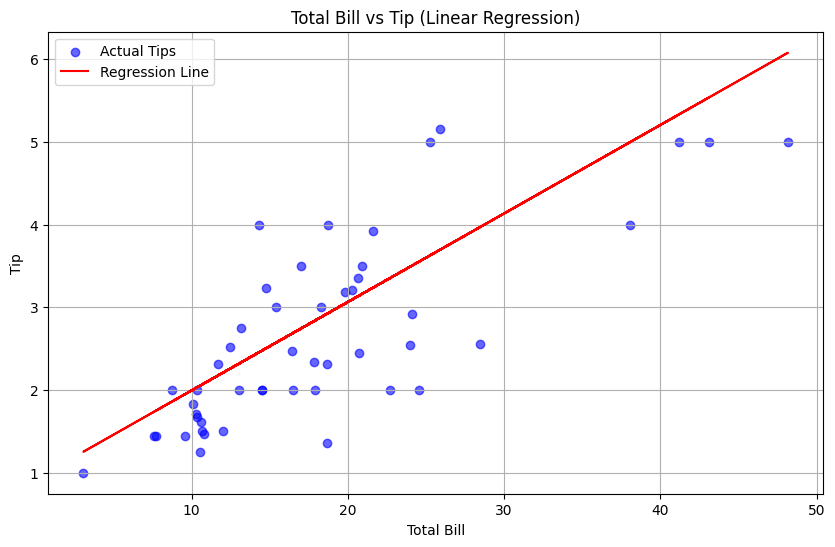

In [3]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the tips dataset
tips = sns.load_dataset('tips')

# Step 2: Inspect the dataset
print(tips.head())

# Step 3: Prepare the data for regression (total bill and tip)
X = tips[['total_bill']]  # Independent variable (total bill)
y = tips['tip']           # Dependent variable (tip)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Step 8: Visualize the regression line along with the data points
plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.scatter(X_test, y_test, color='blue', label='Actual Tips', alpha=0.6)

# Plot the regression line (predicted values)
plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.title('Total Bill vs Tip (Linear Regression)')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### **Q7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.**

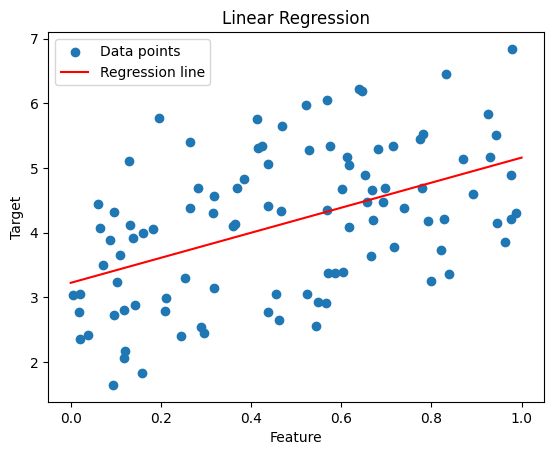

Intercept: [3.22215108]
Slope: [[1.93693502]]


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 + 2 * X + np.random.randn(100, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict new values
X_new = np.linspace(0, 1, 100).reshape(-1, 1)
y_new = model.predict(X_new)

# Plot data points and regression line
plt.scatter(X, y, label='Data points')
plt.plot(X_new, y_new, label='Regression line', color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

### **Q8. Write a Python script that pickles a trained linear regression model and saves it to a file.**

In [ ]:
# Import necessary libraries
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing  # Changed import
from sklearn.model_selection import train_test_split

# Load California Housing dataset
housing = fetch_california_housing()  # Changed to fetch_california_housing
X = housing.data
y = housing.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Pickle the trained model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved to linear_regression_model.pkl")

Model saved to linear_regression_model.pkl


### **Q9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.**

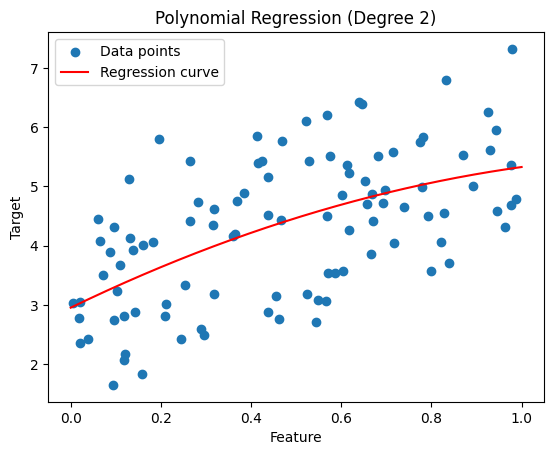

Intercept: [2.95139826]
Coefficients: [[ 0.          3.68201685 -1.30762372]]


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate sample dataset
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 + 2 * X + 0.5 * X**2 + np.random.randn(100, 1)

# Create polynomial regression model (degree 2)
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit model to data
model.fit(X, y)

# Predict values for plotting
X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)
y_plot = model.predict(X_plot)

# Plot data points and regression curve
plt.scatter(X, y, label='Data points')
plt.plot(X_plot, y_plot, label='Regression curve', color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

# Print coefficients
print('Intercept:', model.named_steps['linearregression'].intercept_)
print('Coefficients:', model.named_steps['linearregression'].coef_)

### **Q10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.**

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1)  # Random X values
y = 3 + 2 * X + np.random.randn(100, 1)  # y = 3 + 2X + ε

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model coefficients
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

# Print model summary
print("Model Equation: y = {:.2f} + {:.2f}X".format(model.intercept_[0], model.coef_[0][0]))

Coefficient: [[1.93693502]]
Intercept: [3.22215108]
Model Equation: y = 3.22 + 1.94X


### **Q11. Write a Python script that fits a polynomial regression model (degree 3) to a synthetic non-linear dataset and plots the curve.**

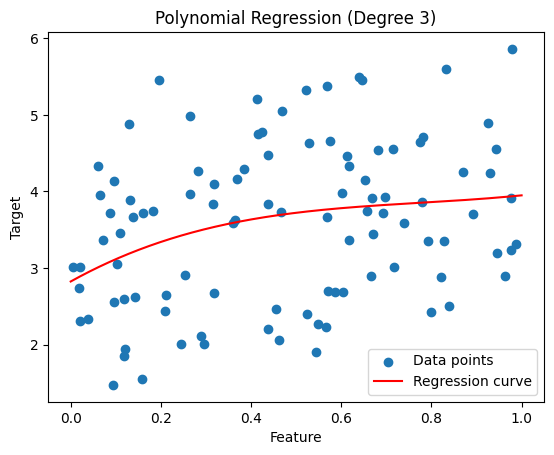

Intercept: [2.8231149]
Coefficients: [[ 0.          3.27279611 -3.76276629  1.61526969]]


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic non-linear dataset
np.random.seed(0)
X = np.random.rand(100, 1)  # Random X values
y = 3 + 2 * X**2 - X**3 + np.random.randn(100, 1)  # y = 3 + 2X^2 - X^3 + ε

# Create polynomial regression model (degree 3)
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Fit model to data
model.fit(X, y)

# Predict values for plotting
X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)
y_plot = model.predict(X_plot)

# Plot data points and regression curve
plt.scatter(X, y, label='Data points')
plt.plot(X_plot, y_plot, label='Regression curve', color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()

# Print coefficients
print('Intercept:', model.named_steps['linearregression'].intercept_)
print('Coefficients:', model.named_steps['linearregression'].coef_)

### **Q12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.**

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic dataset
np.random.seed(0)
X1 = np.random.rand(100)  # Random feature 1
X2 = np.random.rand(100)  # Random feature 2
y = 3 + 2 * X1 + 4 * X2 + np.random.randn(100)  # y = 3 + 2X1 + 4X2 + ε

# Create and fit linear regression model
X = np.column_stack((X1, X2))  # Combine features
model = LinearRegression()
model.fit(X, y)

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict values for R-squared calculation
y_pred = model.predict(X)

# Calculate and print R-squared score
r2 = r2_score(y, y_pred)
print("R-squared score:", r2)

# Print model equation
print("Model Equation: y = {:.2f} + {:.2f}X1 + {:.2f}X2".format(model.intercept_, model.coef_[0], model.coef_[1]))


Coefficients: [1.44835445 3.74115323]
Intercept: 3.3073053067971516
R-squared score: 0.5884074831061643
Model Equation: y = 3.31 + 1.45X1 + 3.74X2


### **Q13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.**

Linear Regression Model: y = 2.77x + 0.22


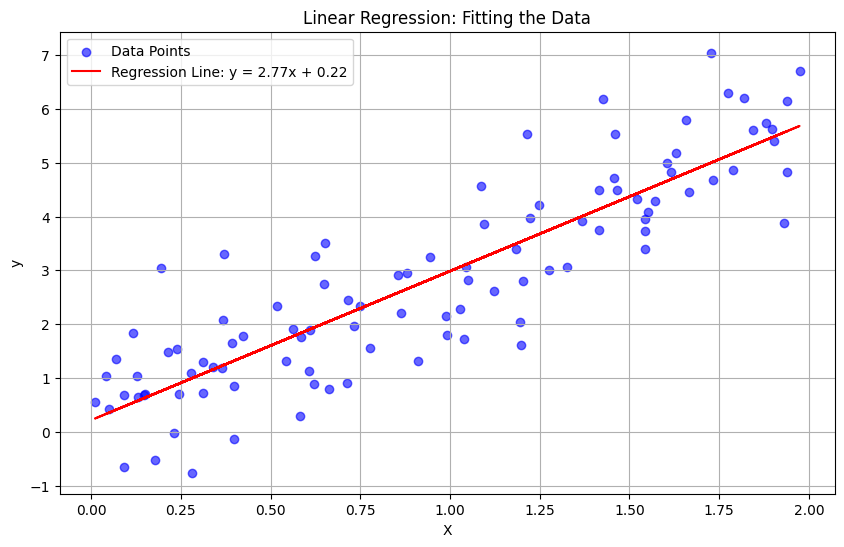

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
# Let's create a simple linear relationship: y = 3x + noise
np.random.seed(42)  # For reproducibility

# Generate 100 random data points for X
X = 2 * np.random.rand(100, 1)  # Random values between 0 and 2
y = 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# Step 2: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Get the slope (coefficient) and intercept from the trained model
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

# Step 4: Predict the values based on the trained model
y_pred = model.predict(X)

# Step 5: Visualize the data points and the regression line
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)

# Plot the regression line
plt.plot(X, y_pred, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

# Adding labels and title
plt.title('Linear Regression: Fitting the Data')
plt.xlabel('X')
plt.ylabel('y')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


### **Q14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.**

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    """Calculates the Variance Inflation Factor (VIF) for each feature in a dataset.

    Args:
        X: A pandas DataFrame containing the features.

    Returns:
        A pandas DataFrame with the VIF for each feature.
    """
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data


# Example usage (using the provided DataFrame 'df'):
# Create a DataFrame with 'x1' and 'x2' columns from the existing arrays
new_df = pd.DataFrame({'x1': x1, 'x2': x2})
vif_values = calculate_vif(new_df[['x1', 'x2']]) # Calculate VIF for the new DataFrame
vif_values

,feature,VIF
0,x1,1.013607
1,x2,1.013607


### **Q15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.**

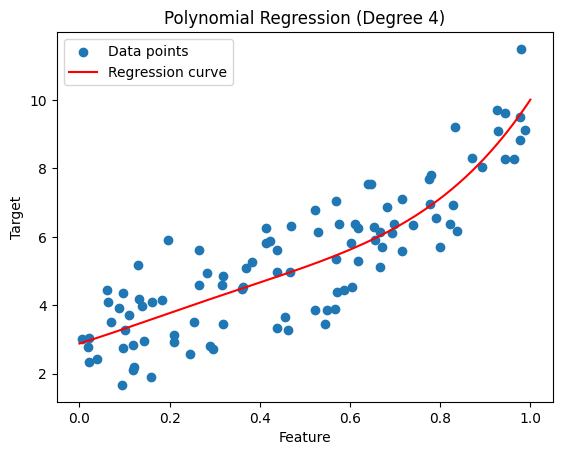

Intercept: [2.88354598]
Coefficients: [[  0.           4.08235371   3.63415939 -10.85740966  10.26268063]]
Model Equation: y = 4.08 + 3.63X + -10.86X^2 + 10.26X^3 + 2.88X^4


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic data for polynomial relationship (degree 4)
np.random.seed(0)
X = np.random.rand(100, 1)  # Random feature
y = 3 + 2 * X + 4 * X**2 - 5 * X**3 + 6 * X**4 + np.random.randn(100, 1)  # y = 3 + 2X + 4X^2 - 5X^3 + 6X^4 + ε

# Create polynomial regression model (degree 4)
model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Fit model to data
model.fit(X, y)

# Predict values for plotting
X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)
y_plot = model.predict(X_plot)

# Plot data points and regression curve
plt.scatter(X, y, label='Data points')
plt.plot(X_plot, y_plot, label='Regression curve', color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 4)')
plt.legend()
plt.show()

# Print coefficients
print('Intercept:', model.named_steps['linearregression'].intercept_)
print('Coefficients:', model.named_steps['linearregression'].coef_)

# Print model equation
coeffs = model.named_steps['linearregression'].coef_[0].tolist() + [model.named_steps['linearregression'].intercept_[0]]
print("Model Equation: y = {:.2f} + {:.2f}X + {:.2f}X^2 + {:.2f}X^3 + {:.2f}X^4".format(coeffs[1], coeffs[2], coeffs[3], coeffs[4], coeffs[5]))

### **Q16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.**

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#from sklearn.datasets import load_boston # Removed the problematic import
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing # Import for California housing dataset

# Load California Housing dataset instead of Boston Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create machine learning pipeline
pipe = Pipeline([
    ('std', StandardScaler()),  # Data standardization
    ('mlr', LinearRegression())  # Multiple linear regression
])

# Fit pipeline to training data
pipe.fit(X_train, y_train)

# Make predictions on testing data
y_pred = pipe.predict(X_test)

# Calculate and print R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Print coefficients and intercept
print("Coefficients:", pipe.named_steps['mlr'].coef_)
print("Intercept:", pipe.named_steps['mlr'].intercept_)

R-squared score: 0.575787706032451
Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept: 2.071946937378619


### **Q17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.**

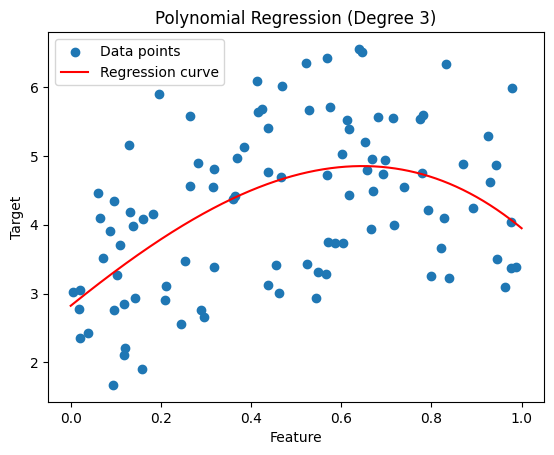

Coefficients: [[ 0.          5.27279611 -1.76276629 -2.38473031]]
Intercept: [2.8231149]
Model Equation: y = 5.27 + -1.76X + -2.38X^2 + 2.82X^3


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 1)  # Random feature
y = 3 + 2 * X + 4 * X**2 - 5 * X**3 + np.random.randn(100, 1)  # y = 3 + 2X + 4X^2 - 5X^3 + ε

# Create polynomial regression model (degree 3)
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Fit model to data
model.fit(X, y)

# Predict values for plotting
X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)
y_plot = model.predict(X_plot)

# Plot data points and regression curve
plt.scatter(X, y, label='Data points')
plt.plot(X_plot, y_plot, label='Regression curve', color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()

# Print coefficients and intercept
print('Coefficients:', model.named_steps['linearregression'].coef_)
print('Intercept:', model.named_steps['linearregression'].intercept_)

# Print model equation
coeffs = model.named_steps['linearregression'].coef_[0].tolist() + [model.named_steps['linearregression'].intercept_[0]]
print("Model Equation: y = {:.2f} + {:.2f}X + {:.2f}X^2 + {:.2f}X^3".format(coeffs[1], coeffs[2], coeffs[3], coeffs[4]))

### **Q18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.**

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic dataset with 5 features
np.random.seed(0)
X = np.random.rand(100, 5)  # Random features
y = 3 + 2 * X[:, 0] + 4 * X[:, 1] - 5 * X[:, 2] + 6 * X[:, 3] + 7 * X[:, 4] + np.random.randn(100)  # Target variable

# Create multiple linear regression model
model = LinearRegression()

# Fit model to data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print R-squared score
r2 = r2_score(y, y_pred)
print("R-squared score:", r2)

# Print model coefficients
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i+1}: {coef}")

# Print intercept
print("Intercept:", model.intercept_)

# Print model equation
print("Model Equation: y = {:.2f} + {:.2f}X1 + {:.2f}X2 + {:.2f}X3 + {:.2f}X4 + {:.2f}X5".format(model.intercept_, *model.coef_))

R-squared score: 0.908962154971889
Coefficients:
Feature 1: 1.9943207321521481
Feature 2: 3.7407280031396652
Feature 3: -4.490654564313616
Feature 4: 5.998135069617114
Feature 5: 6.645639013405458
Intercept: 3.0362959820570854
Model Equation: y = 3.04 + 1.99X1 + 3.74X2 + -4.49X3 + 6.00X4 + 6.65X5


### **Q19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.**

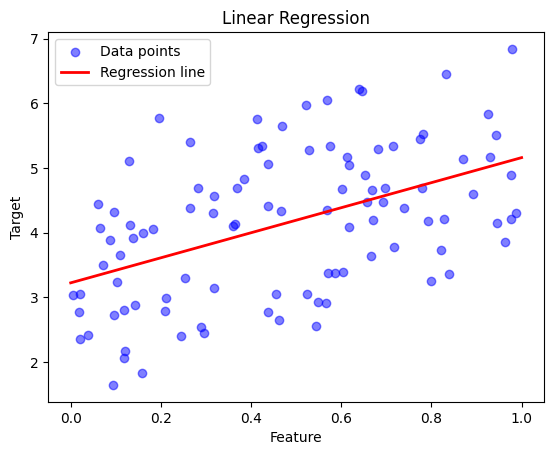

Coefficient: [[1.93693502]]
Intercept: [3.22215108]
Model Equation: y = 3.22 + 1.94X


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data for linear regression
np.random.seed(0)
X = np.random.rand(100, 1)  # Random feature
y = 3 + 2 * X + np.random.randn(100, 1)  # y = 3 + 2X + ε

# Create and fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for plotting
X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)
y_plot = model.predict(X_plot)

# Plot data points and regression line
plt.scatter(X, y, label='Data points', color='blue', alpha=0.5)
plt.plot(X_plot, y_plot, label='Regression line', color='red', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print coefficients and intercept
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

# Print model equation
print("Model Equation: y = {:.2f} + {:.2f}X".format(model.intercept_[0], model.coef_[0][0]))

### **Q20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R-squared score and coefficients.**

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create synthetic dataset with 3 features
np.random.seed(0)
X = np.random.rand(100, 3)  # Random features
y = 3 + 2 * X[:, 0] + 4 * X[:, 1] - 5 * X[:, 2] + np.random.randn(100)  # Target variable

# Create and fit multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print R-squared score
r2 = r2_score(y, y_pred)
print("R-squared score:", r2)

# Print coefficients
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i+1}: {coef}")

# Print intercept
print("Intercept:", model.intercept_)

# Print model equation
print("Model Equation: y = {:.2f} + {:.2f}X1 + {:.2f}X2 + {:.2f}X3".format(model.intercept_, *model.coef_))

R-squared score: 0.799116523612738
Coefficients:
Feature 1: 1.591324773900694
Feature 2: 3.9799566326961555
Feature 3: -4.7467690143819645
Intercept: 2.9502139024683545
Model Equation: y = 2.95 + 1.59X1 + 3.98X2 + -4.75X3


### **Q21.  Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.**

In [5]:
# Import necessary libraries
import joblib
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Step 1: Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Save the trained model to a file using joblib
model_filename = 'linear_regression_model.joblib'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Step 5: Load the model from the file
loaded_model = joblib.load(model_filename)
print(f"Model loaded from {model_filename}")

# Step 6: Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)

# Step 7: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Model saved to linear_regression_model.joblib
Model loaded from linear_regression_model.joblib
Mean Squared Error: 104.2022
R-squared: 0.9374


### **Q22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load Seaborn 'tips' dataset
tips = sns.load_dataset('tips')
print(tips.head())

# Preprocess data
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['tip']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded_sex = encoder.fit_transform(tips[['sex']])
encoded_smoker = encoder.fit_transform(tips[['smoker']])
encoded_day = encoder.fit_transform(tips[['day']])
encoded_time = encoder.fit_transform(tips[['time']])

# Create new features
X = pd.DataFrame(np.concatenate((X[['total_bill', 'size']], encoded_sex, encoded_smoker, encoded_day, encoded_time), axis=1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print R-squared score
print("R-squared score:", r2_score(y_test, y_pred))

# Print coefficients
print("Coefficients:")
print(model.coef_)

# Print intercept
print("Intercept:", model.intercept_)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
R-squared score: 0.43730181943482493
Coefficients:
[ 0.09469974  0.23348393 -0.01440964  0.01440964  0.09617663 -0.09617663
  0.10407492 -0.08171038  0.05328153 -0.07564606 -0.04747858  0.04747858]
Intercept: 0.5890523762058075


### **Q23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R-squared score.**

In [6]:
# Import necessary libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
import numpy as np

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_y_pred)

print("Linear Regression:")
print("Coefficients:", lr_model.coef_)
print("R-squared:", lr_r2)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("\nRidge Regression:")
print("Coefficients:", ridge_model.coef_)
print("R-squared:", ridge_r2)

Linear Regression:
Coefficients: [60.62471229 98.64257547 64.41712289 57.00101398 35.62789458]
R-squared: 0.9999858799929303

Ridge Regression:
Coefficients: [59.91699371 97.14386411 63.10656395 56.25962617 35.36017241]
R-squared: 0.9997735249437104


### **Q24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.**

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=5, noise=0.5, random_state=42)

# Create linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R-squared scores:", cv_scores)
print("Mean R-squared score:", np.mean(cv_scores))

Cross-validation R-squared scores: [0.99998268 0.99997517 0.99999428 0.99997931 0.99998349]
Mean R-squared score: 0.9999829848440452


### **Q25. Write a Python script that compares polynomial regression models of different degrees and prints the R-squared score for each.**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 + 2 * X + 4 * X**2 - 5 * X**3 + 6 * X**4 + np.random.randn(100, 1)

# Degrees of polynomial regression to compare
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Create and train the polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate and print the R-squared score
    r2 = r2_score(y, y_pred)
    print(f"Polynomial Regression (Degree {degree}): R-squared = {r2}")

Polynomial Regression (Degree 1): R-squared = 0.724358100867321
Polynomial Regression (Degree 2): R-squared = 0.7598464569130117
Polynomial Regression (Degree 3): R-squared = 0.7675141339733483
Polynomial Regression (Degree 4): R-squared = 0.7680632811930611
Polynomial Regression (Degree 5): R-squared = 0.7680747374812164
